<a href="https://colab.research.google.com/github/NithinYaka/Data-Science-Projects/blob/main/Store_Sales_Forecasting_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing Dataset**

In [54]:
dataset=pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')

**EDA**

In [55]:
dataset.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [56]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [58]:
# Convert 'Order Date' and 'Ship Date' to datetime objects
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'])

# Display the data types to confirm the changes
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

None

In [59]:
# Select features (X) and target variable (y)
X = dataset[['Quantity', 'Discount', 'Profit']]
y = dataset['Sales']

# Display the first few rows of X and y to confirm
display(X.head())
display(y.head())

,Quantity,Discount,Profit
0,2,0.00,41.9136
1,3,0.00,219.5820
2,5,0.45,-383.0310
3,7,0.00,14.1694
4,9,0.20,85.3092


,Sales
0,261.9600
1,731.9400
2,957.5775
3,48.8600
4,1706.1840


**Apply Linear Regression Model**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display a message indicating that the model has been trained
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Predicting**

In [61]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predicted values to confirm
display(y_pred[:5])

array([462.578, 711.248, 253.774, 851.954, 218.829])

In [62]:
# Concatenate predicted and actual sales for comparison
comparison = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)), 1)

# Set print options for better readability and print the comparison
np.set_printoptions(precision=3)
print(comparison)

[[4.626e+02 9.420e+01]
 [7.112e+02 1.686e+03]
 [2.538e+02 1.884e+01]
 [8.520e+02 5.825e+01]
 [2.188e+02 6.984e+00]
 [7.777e+02 3.278e+02]
 [4.457e+02 2.540e+01]
 [6.343e+02 1.218e+01]
 [6.608e+02 5.471e+01]
 [6.534e+02 1.396e+02]
 [2.735e+02 3.171e+02]
 [1.597e+02 2.746e+01]
 [2.631e+02 3.330e+02]
 [5.990e+01 7.380e+00]
 [1.835e+02 1.834e+02]
 [1.613e+02 2.680e+01]
 [1.580e+02 1.396e+01]
 [9.171e+01 1.952e+02]
 [1.559e+02 6.160e+00]
 [2.527e+02 1.731e+01]
 [2.809e+02 5.335e+01]
 [4.250e+02 9.335e+02]
 [5.516e+02 1.314e+02]
 [1.818e+02 2.020e+02]
 [1.839e+02 9.937e+01]
 [7.630e+02 2.398e+02]
 [2.569e+02 3.774e+01]
 [2.580e+02 1.244e+02]
 [4.481e+02 7.239e+02]
 [1.237e+02 7.692e+00]
 [2.550e+02 2.742e+01]
 [6.035e+02 3.836e+02]
 [6.768e+02 2.274e+02]
 [5.444e+02 1.487e+03]
 [7.390e+02 4.712e+01]
 [1.867e+02 4.752e+01]
 [3.016e+02 3.027e+02]
 [2.672e+02 1.464e+02]
 [2.491e+02 2.424e+02]
 [3.662e+02 7.760e+01]
 [3.593e+02 2.419e+02]
 [2.719e+02 1.263e+02]
 [3.595e+02 4.113e+02]
 [8.201e+01

**Visualizing Actual VS Predicted Values using Linear Regression**

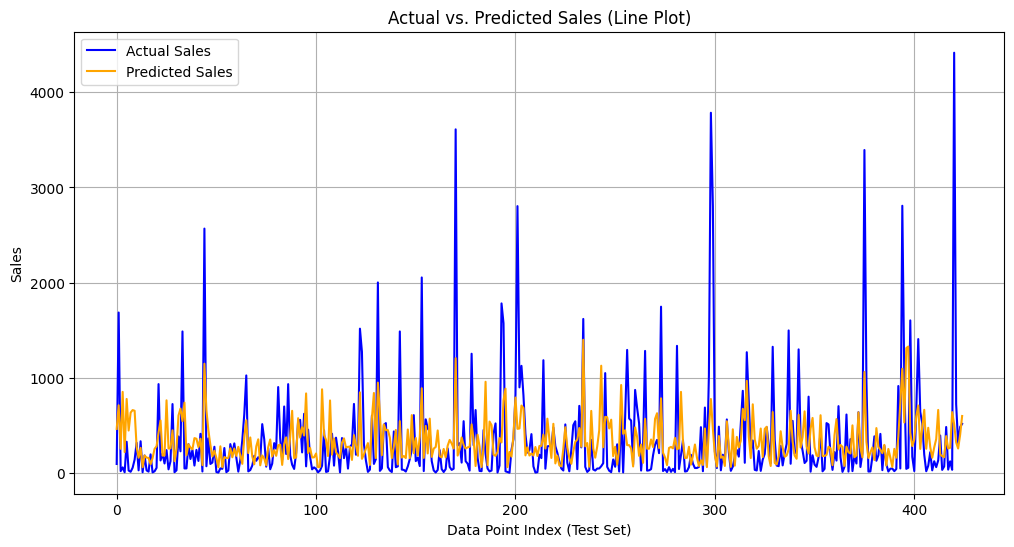

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred, label='Predicted Sales', color='orange')
plt.xlabel("Data Point Index (Test Set)")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales (Line Plot)")
plt.legend()
plt.grid(True)
plt.show()

**Generating Future Dates for forecasting**

In [70]:
last_date = dataset['Order Date'].max()
future_dates = pd.date_range(start=last_date, periods=13, freq='M')[1:]

# Get the features from the last date in the dataset
last_date_features = dataset[dataset['Order Date'] == last_date][['Quantity', 'Discount', 'Profit']].iloc[0]

# Create a DataFrame for future features by adding random noise to the last date's features for each period
num_future_periods = len(future_dates)
future_features = pd.DataFrame({
    'Quantity': [max(0, last_date_features['Quantity'] + np.random.randint(-2, 3)) for _ in range(num_future_periods)], # Add random integer between -2 and 2
    'Discount': [max(0, min(0.7, last_date_features['Discount'] + np.random.uniform(-0.1, 0.1))) for _ in range(num_future_periods)], # Add random float between -0.1 and 0.1, capped between 0 and 0.7
    'Profit': [last_date_features['Profit'] + np.random.uniform(-50, 50) for _ in range(num_future_periods)] # Add random float between -50 and 50
}, index=future_dates)


# Make predictions for future sales
future_forecast = model.predict(future_features)

# Create a DataFrame for the future forecast
future_forecast_df = pd.DataFrame(future_forecast, index=future_dates, columns=['Future Sales Forecast'])

# Display the tabular forecast
display(future_forecast_df)

/tmp/ipython-input-70-262264964.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=13, freq='M')[1:]


,Future Sales Forecast
2018-01-31,497.633710
2018-02-28,269.486041
2018-03-31,204.547878
2018-04-30,256.897665
2018-05-31,215.083942
2018-06-30,573.107537
2018-07-31,596.286245
2018-08-31,381.453021
2018-09-30,194.785906
2018-10-31,559.754835


**Histogram for Future Sales Forecast**

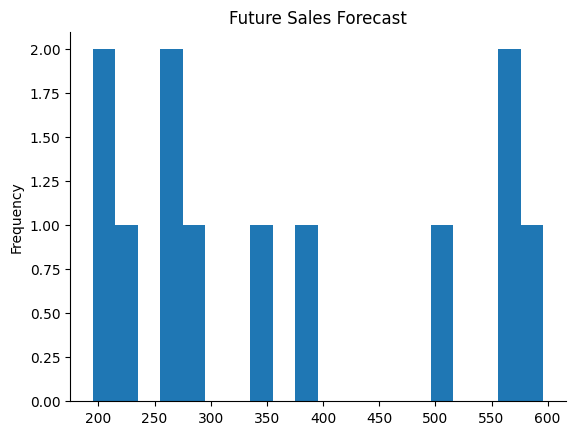

In [71]:
future_forecast_df['Future Sales Forecast'].plot(kind='hist', bins=20, title='Future Sales Forecast')
plt.gca().spines[['top', 'right',]].set_visible(False)

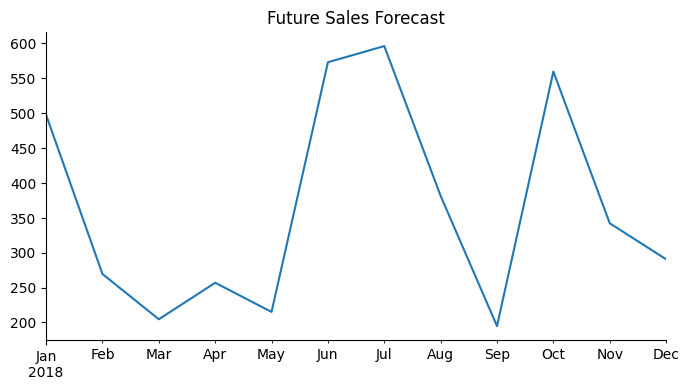

In [72]:
future_forecast_df['Future Sales Forecast'].plot(kind='line', figsize=(8, 4), title='Future Sales Forecast')
plt.gca().spines[['top', 'right']].set_visible(False)